In [3]:
cd ..

/cellar/users/agross/TCGA_Code/Methlation


importing IPython notebook from Parallel/Age_HIV_Features

importing IPython notebook from HIV_Age_Advancement

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


importing IPython notebook from Setup/MethylationAgeModels

importing IPython notebook from Setup/Read_HIV_Data

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2138     0.9326    5.59 1.25e-07 ***
chron_age     0.9790     0.0600   16.32  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.886 on 132 degrees of freedom
Multiple R-squared:  0.6685,	Adjusted R-squared:  0.666 
F-statistic: 266.2 on 1 and 132 DF,  p-value: < 2.2e-16


                2.5 %   97.5 %
(Intercept) 3.3689637 7.058680
chron_age   0.8602881 1.097651



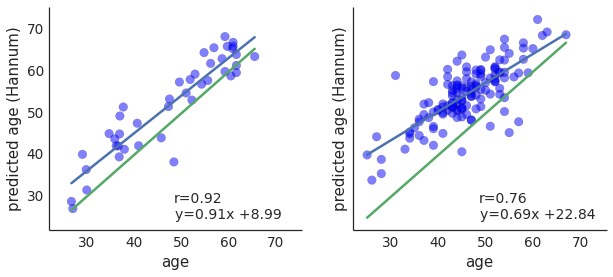

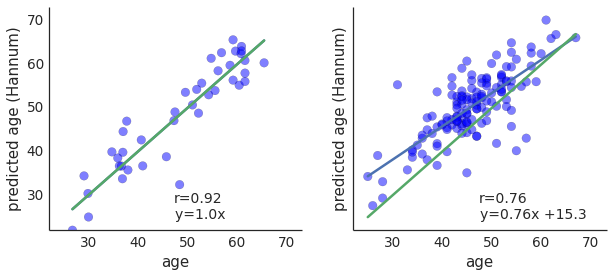

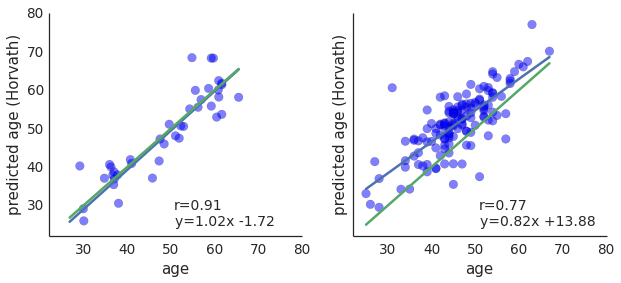

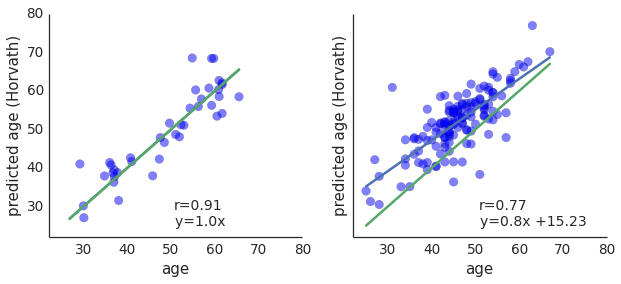

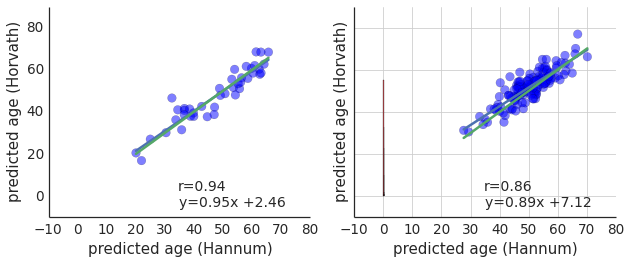

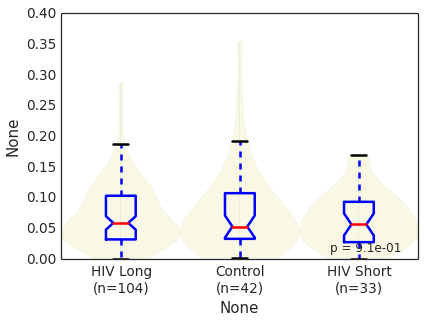

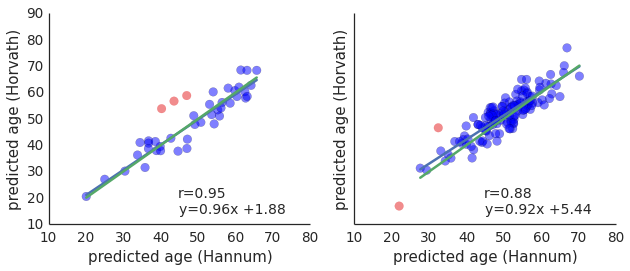

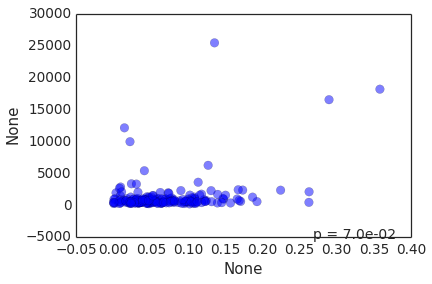

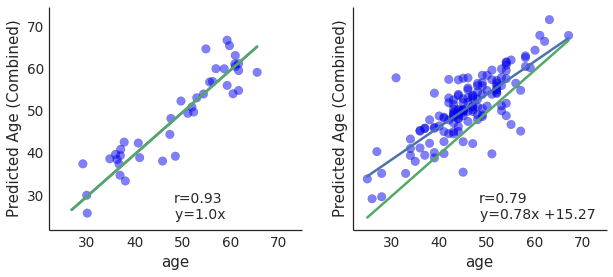

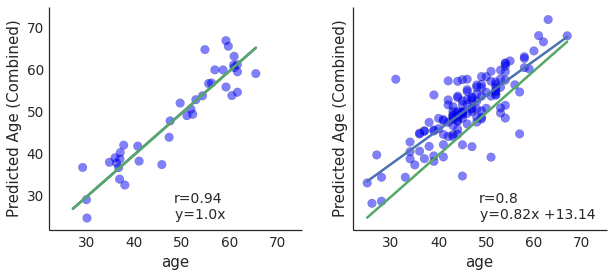

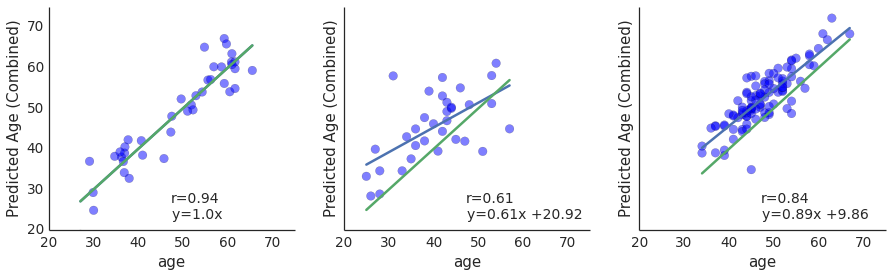

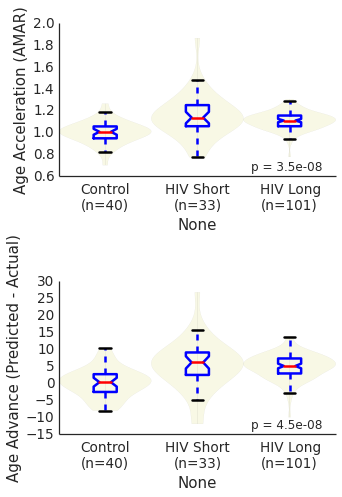

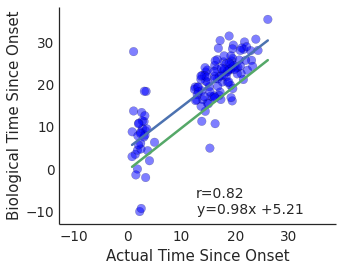

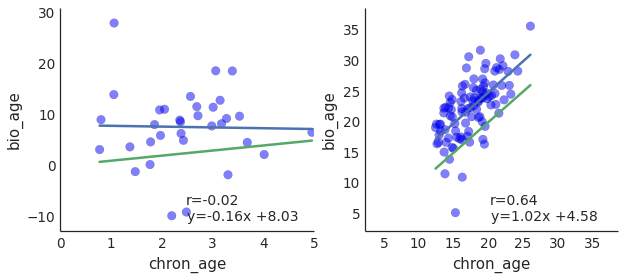

In [4]:
import NotebookImport
from Parallel.Age_HIV_Features import *

In [5]:
filtered = df_hiv.index.diff(probe_idx)

In [6]:
len(filtered)

12468

In [7]:
filtered.tofile(FIGDIR + 'filtered_probes.csv', sep='\n')

In [9]:
age_hannum = bhCorrection(p_vals.in_set_s1.ix[probe_idx]) < .01

In [10]:
f = {'Age (Hannum)': age_hannum,
     'Age (validated)': g_age_2,
     'HIV': g_hiv,
     'Age only': features['Age (BH)'],
     'HIV + Age': features['HIV + Age (BH)'],
     'HIV only': features['HIV (BH)']}
marker_summary = pd.concat(f, axis=1).astype(int)

In [11]:
marker_summary.sum().order()

HIV + Age           5631
Age only           21296
Age (validated)    26927
Age (Hannum)       61592
HIV only           75730
HIV                81361
dtype: int64

In [12]:
marker_summary[['Age (Hannum)','Age (validated)','Age only', 'HIV',
                'HIV only','HIV + Age']].to_csv(FIGDIR + 'marker_summary.csv')

In [13]:
p = res['in_set_s1']['age_LR']['p']
mx_models = res['in_set_s1']['multi_variate'].join(p).ix[ti(age_hannum)]
mx_models.sort('p').to_csv(FIGDIR + 'hannum_age.csv')

In [29]:
p = res['in_set_s3']['age_LR']['p']
mx_models = res['in_set_s3']['multi_variate'].join(p).ix[ti(g_age_2)]
mx_models.sort('p').to_csv(FIGDIR + 'EPIC_age.csv')

In [15]:
p = r4['HIV_LR']['p']
hiv_models = r4['multi_variate'].join(p).ix[ti(g_hiv)]
hiv_models.sort('p').to_csv(FIGDIR + 'HIV_models.csv')